In [ ]:
#import basic pyton libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as smf
import statsmodels.formula.api as smf

In [ ]:
#read file
delivery = pd.read_csv("delivery_time.csv")
delivery

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
#EDA techniques
delivery.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
delivery.shape

(21, 2)

In [ ]:
delivery.size

42

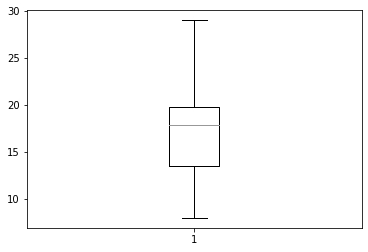

In [ ]:
#visualisations
plt.boxplot(delivery['DeliveryTime'])
plt.show()

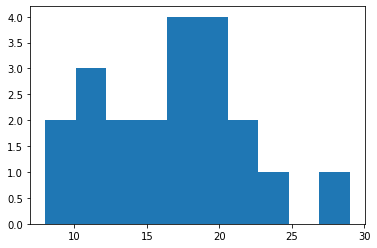

In [ ]:
plt.hist(delivery['DeliveryTime'])
plt.show()

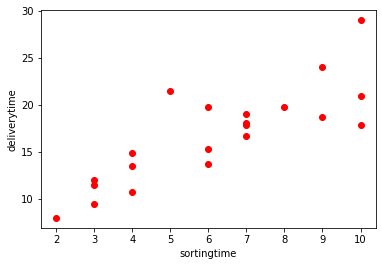

In [ ]:
plt.scatter(x=delivery['SortingTime'],y=delivery['DeliveryTime'],color="red")
plt.xlabel("sortingtime")
plt.ylabel("deliverytime")
plt.show()

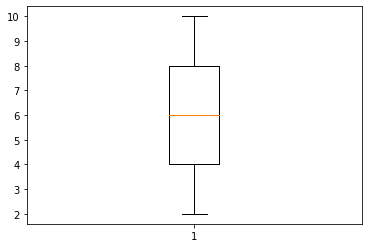

In [ ]:
plt.boxplot(delivery['SortingTime'])
plt.show()

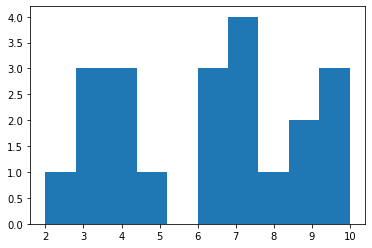

In [ ]:
plt.hist(delivery['SortingTime'])
plt.show()

In [ ]:
delivery.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


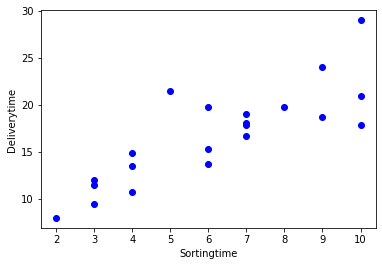

In [ ]:
plt.plot(delivery['SortingTime'],delivery['DeliveryTime'],"bo")
plt.xlabel("Sortingtime")
plt.ylabel("Deliverytime")
plt.show()

In [ ]:
#build model
delivery1 = smf.ols('DeliveryTime~SortingTime',data=delivery).fit()
delivery1

In [ ]:
delivery1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           3.98e-06
Time:                        15:55:49   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred1 = delivery1.predict(delivery.SortingTime)
pred1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [ ]:
z=pd.DataFrame(pred1)
z

,0
0,23.072933
1,13.178814
2,16.476853
3,21.423913
4,23.072933
5,16.476853
6,18.125873
7,11.529794
8,23.072933
9,21.423913


In [ ]:
delivery1.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [ ]:
delivery1.resid_pearson

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [ ]:
rmse_a = np.sqrt(np.mean((np.array(delivery['DeliveryTime'])-np.array(pred1))**2))
rmse_a

2.7916503270617654

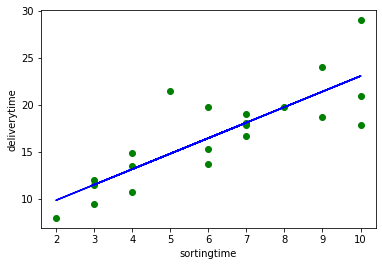

In [ ]:
plt.scatter(x=delivery['SortingTime'],y=delivery['DeliveryTime'],color= 'green')
plt.plot(delivery['SortingTime'],pred1,color='blue')
plt.xlabel('sortingtime')
plt.ylabel('deliverytime')
plt.show()

In [ ]:
#transformation techniques 
#log transformation
delivery2 = smf.ols('DeliveryTime~np.log(SortingTime)',data = delivery).fit()
delivery2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           2.64e-06
Time:                        17:14:58   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred2 = delivery2.predict(pd.DataFrame(delivery['SortingTime']))
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [ ]:
delivery2.resid

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

In [ ]:
delivery2.resid_pearson

array([-0.34207012, -0.06839109,  0.83061001,  1.0335774 ,  2.44206469,
       -0.70066414,  0.08444506, -0.55504813, -1.42092236, -0.79351107,
       -0.046959  , -1.02543743, -0.72295404,  0.14098557,  0.3254345 ,
        0.41187217, -1.2574911 , -0.22528994,  0.19903082, -0.32273466,
        2.01345289])

In [ ]:
rmse_b = np.sqrt(np.mean((np.array(delivery['DeliveryTime'])-np.array(pred2))**2))
rmse_b

2.733171476682066

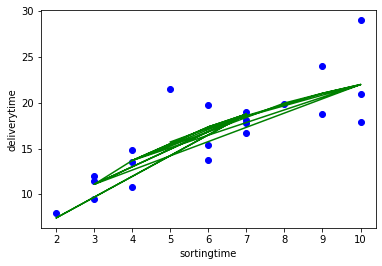

In [ ]:
plt.scatter(x=delivery['SortingTime'],y=delivery['DeliveryTime'],color='blue')
plt.plot(delivery['SortingTime'],pred2,color='green')
plt.xlabel('sortingtime')
plt.ylabel('deliverytime')
plt.show()

In [ ]:
delivery["SortingTime_sq"] = delivery.SortingTime*delivery.SortingTime
delivery 

,DeliveryTime,SortingTime,SortingTime_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


#log transformation

In [ ]:
delivery3 = smf.ols('np.log(DeliveryTime)~SortingTime',data=delivery).fit()
delivery3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Wed, 14 Sep 2022   Prob (F-statistic):           1.59e-06
Time:                          16:21:49   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred3 = delivery3.predict(pd.DataFrame(delivery['SortingTime']))
pred3

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [ ]:
delivery3.resid

0    -0.132365
1     0.059111
2     0.228472
3     0.106718
4     0.190408
5    -0.023566
6     0.084206
7    -0.186735
8    -0.292087
9    -0.140142
10    0.021411
11   -0.168672
12   -0.046023
13    0.004320
14    0.049377
15    0.156440
16   -0.133643
17    0.036231
18   -0.253034
19    0.020649
20    0.418923
dtype: float64

In [ ]:
delivery3.resid_pearson

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

In [ ]:
pred_a=np.exp(pred3)
pred_a

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [ ]:
pred3 = np.exp(pred3)
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [ ]:
rmse_c = np.sqrt(np.mean((np.array(delivery['DeliveryTime'])-np.array(pred3))**2))
rmse_c

2.9402503230562007

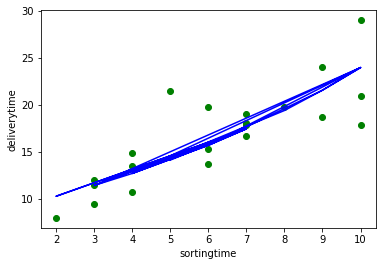

In [ ]:
plt.scatter(x=delivery['SortingTime'],y=delivery['DeliveryTime'],color= 'green')
plt.plot(delivery['SortingTime'],pred_1,color='blue')
plt.xlabel('sortingtime')
plt.ylabel('deliverytime')
plt.show()

In [ ]:
#square transformations
delivery["SortingTime_sq"] = delivery.SortingTime*delivery.SortingTime
delivery 

,DeliveryTime,SortingTime,SortingTime_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [ ]:
delivery4 = smf.ols('np.log(DeliveryTime)~SortingTime+SortingTime_sq',data=delivery).fit()
delivery4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Wed, 14 Sep 2022   Prob (F-statistic):           2.20e-06
Time:                          17:02:10   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
SortingTime        0.2659      0.080      3.315      0.004       0.097       0.434
SortingTime_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred_b= delivery4.predict(delivery)
pred_b

0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64

In [ ]:
pred4 = np.exp(pred_b)
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [ ]:
rmse_d = np.sqrt(np.mean((np.array(delivery['DeliveryTime'])-np.array(pred4))**2))
rmse_d

2.7990419887409317

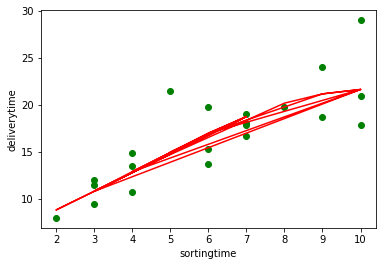

In [ ]:
plt.scatter(x=delivery['SortingTime'],y=delivery['DeliveryTime'],color='green')
plt.plot(delivery['SortingTime'],pred4,color='red')
plt.xlabel('sortingtime')
plt.ylabel('deliverytime')
plt.show()

In [ ]:
#exponential transformations
delivery5 = smf.ols('np.exp(DeliveryTime)~SortingTime',data=delivery).fit()
delivery5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.exp(DeliveryTime)   R-squared:                       0.119
Model:                              OLS   Adj. R-squared:                  0.073
Method:                   Least Squares   F-statistic:                     2.572
Date:                  Wed, 14 Sep 2022   Prob (F-statistic):              0.125
Time:                          17:18:56   Log-Likelihood:                -604.98
No. Observations:                    21   AIC:                             1214.
Df Residuals:                        19   BIC:                             1216.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.324e+11   4.84e+11     -1.099      0.285   -1.55e+12    4.81e+11
SortingTime  1.165e+11   7.26e+10      1.604      0.125   -3.55e+10    2.69e+11
==============================================================================
Omnibus:                       44.249   Durbin-Watson:                   2.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.022
Skew:                           3.442   Prob(JB):                     1.47e-36
Kurtosis:                      14.883   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
delivery6 = smf.ols('DeliveryTime~np.exp(SortingTime)',data=delivery).fit()
delivery6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Wed, 14 Sep 2022   Prob (F-statistic):            0.00396
Time:                        17:20:18   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(SortingTime)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
delivery4.resid_pearson

array([-0.18653701,  0.27510944,  0.92331151,  0.76937448,  1.79789238,
       -0.62623272,  0.0766711 , -0.80301506, -1.16851536, -0.74833548,
       -0.11118848, -1.12531927, -0.72398172,  0.37160353,  0.64861345,
        0.8734897 , -1.3029903 , -0.21828016, -0.61938087, -0.31407821,
        2.21178906])

(array([3., 5., 1., 4., 2., 2., 2., 0., 1., 1.]),
 array([-1.3029903 , -0.95151236, -0.60003442, -0.24855649,  0.10292145,
         0.45439938,  0.80587732,  1.15735525,  1.50883319,  1.86031113,
         2.21178906]),
 <a list of 10 Patch objects>)

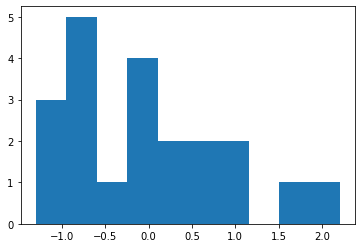

In [ ]:
plt.hist(delivery4.resid_pearson)

Text(0, 0.5, 'standardized residual')

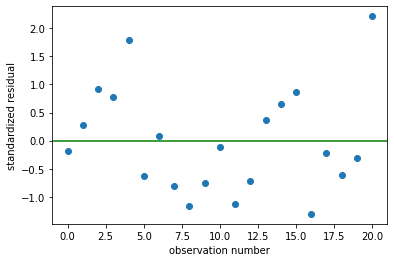

In [ ]:
plt.scatter(np.arange(21),delivery4.resid_pearson)
plt.axhline(y=0,color='green')
plt.xlabel('observation number')
plt.ylabel('standardized residual')

In [ ]:
data = {"Model":pd.Series(["rmse_a","rmse_b","rmse_c","rmse_d"]),
        "RMSE_values":pd.Series([rmse_a,rmse_b,rmse_c,rmse_d]),
        "Rsquare":pd.Series([delivery1.rsquared,delivery2.rsquared,delivery3.rsquared,delivery4.rsquared])}

tabel = pd.DataFrame(data)
tabel        


,Model,RMSE_values,Rsquare
0,rmse_a,2.791650,0.682271
1,rmse_b,2.733171,0.695443
2,rmse_c,2.940250,0.710948
3,rmse_d,2.799042,0.764867


In [ ]:
#delivery4 model is the best model because it has higest rsquare value i.e (0.764)